### Assignment 1

### Order of operations matters

In [1]:
import os
import urllib.request

In [2]:
filename = 'air.2m.mon.ltm.1981-2010.nc'
if not os.path.isfile(filename):
    url = 'https://downloads.psl.noaa.gov//Datasets/ncep.reanalysis/Monthlies/surface_gauss/'+filename
    urllib.request.urlretrieve(url, filename)

In [3]:
import xarray as xr
ds = xr.open_dataset(filename, decode_times=False)
ds

<xarray.Dataset>
Dimensions:             (lat: 94, lon: 192, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 88.54 86.65 84.75 ... -84.75 -86.65 -88.54
  * lon                 (lon) float32 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time                (time) float64 -6.571e+05 -6.57e+05 ... -6.567e+05
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    air                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Conventions:                    COARDS
    title:                          mean daily NMC reanalysis (1958)
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    dataset_title:                  NCEP-NCAR Reanalysis 1
    References:                     http://www.psl.noaa.gov/data/gridded/data...

In [4]:
import numpy as np
lat = ds.lat
lon = ds.lon
weights = np.cos(np.deg2rad(lat))
weights.name = "weights"

#Calculate time-averaged temperature 
Ts = ds.data_vars['air'] - 273.15
meanTs = Ts.mean(dim='time') 

#Calculate OLR in each grid firstly
sigma = 5.67e-8
Ro_grid = sigma * (meanTs+273.15)**4 

# Perform area-weighted average

Ro_grid_weighted = Ro_grid.weighted(weights)
gmTs_weighted = Ro_grid_weighted.mean(("lon", "lat"))
gmTs_weighted

<xarray.DataArray 'air' ()>
array(391.26251488)

### Time step matters.

Text(0.5, 1.0, 'time_step = 30 days, water_depth = 10')

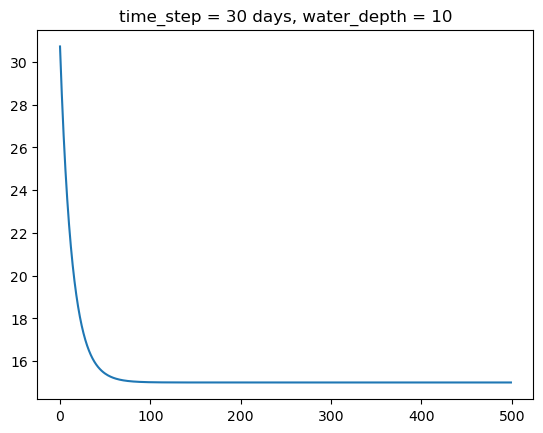

In [5]:
#  As usual, we start with some import statements.
import numpy as np
import matplotlib.pyplot as plt
import climlab  # import climlab just like any other package

# create a zero-dimensional domain with a single surface temperature
state = climlab.surface_state(num_lat=1,  # a single point
                              water_depth = 1.,  # 10 meters slab of water (sets the heat capacity)
                             )

delta_t = 60. * 60. * 24. * 1 # one year!

#  create the longwave radiation process
olr = climlab.radiation.Boltzmann(name='OutgoingLongwave',
                                  state=state, 
                                  tau = 0.612,
                                  eps = 1.,
                                  timestep = delta_t)

#  create the shortwave radiation process
asr = climlab.radiation.SimpleAbsorbedShortwave(name='AbsorbedShortwave',
                                                state=state, 
                                                insolation=341.3, 
                                                albedo=0.299,
                                                timestep = delta_t)


#  couple them together into a single model
ebm = climlab.couple([olr,asr])
#  Give the parent process name
ebm.name = 'EnergyBalanceModel'
#  Examine the model object

# Make a plot
import matplotlib.pyplot as plt
data = np.zeros(500)
for i in np.arange(500):
    ebm.step_forward()
    data[i] = ebm.Ts

plt.plot(data)
plt.title("time_step = 30 days, water_depth = 10")

Text(0.5, 1.0, 'time_step = 30 days and water_depth = 10 meters')

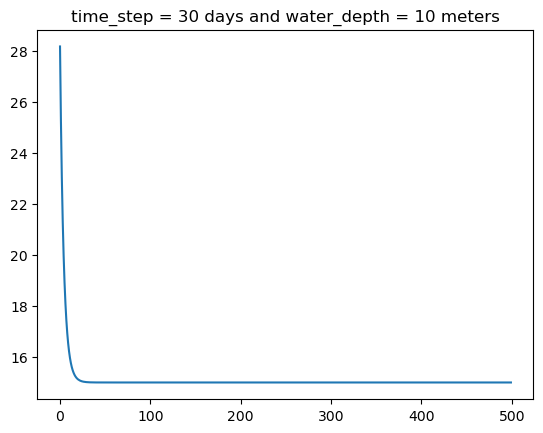

In [8]:
#  As usual, we start with some import statements.
import numpy as np
import matplotlib.pyplot as plt
import climlab  # import climlab just like any other package

# create a zero-dimensional domain with a single surface temperature
state = climlab.surface_state(num_lat=1,  # a single point
                              water_depth = 10.,  # 10 meters slab of water (sets the heat capacity)
                             )

delta_t = 60. * 60. * 24. * 30 # one month!

#  create the longwave radiation process
olr = climlab.radiation.Boltzmann(name='OutgoingLongwave',
                                  state=state, 
                                  tau = 0.612,
                                  eps = 1.,
                                  timestep = delta_t)

#  create the shortwave radiation process
asr = climlab.radiation.SimpleAbsorbedShortwave(name='AbsorbedShortwave',
                                                state=state, 
                                                insolation=341.3, 
                                                albedo=0.299,
                                                timestep = delta_t)


#  couple them together into a single model
ebm = climlab.couple([olr,asr])
#  Give the parent process name
ebm.name = 'EnergyBalanceModel'
#  Examine the model object

# Make a plot
import matplotlib.pyplot as plt
data = np.zeros(500)
for i in np.arange(500):
    ebm.step_forward()
    data[i] = ebm.Ts

plt.plot(data)
plt.title("time_step = 30 days and water_depth = 10 meters")

Text(0.5, 1.0, 'time_step = 1 year and water_depth = 10 meters')

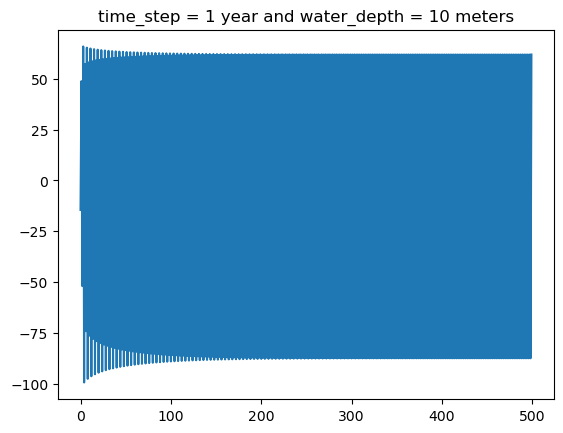

In [10]:
#  As usual, we start with some import statements.
import numpy as np
import matplotlib.pyplot as plt
import climlab  # import climlab just like any other package

# create a zero-dimensional domain with a single surface temperature
state = climlab.surface_state(num_lat=1,  # a single point
                              water_depth = 10.,  # 10 meters slab of water (sets the heat capacity)
                             )

delta_t = 60. * 60. * 24. * 365 # one year!

#  create the longwave radiation process
olr = climlab.radiation.Boltzmann(name='OutgoingLongwave',
                                  state=state, 
                                  tau = 0.612,
                                  eps = 1.,
                                  timestep = delta_t)

#  create the shortwave radiation process
asr = climlab.radiation.SimpleAbsorbedShortwave(name='AbsorbedShortwave',
                                                state=state, 
                                                insolation=341.3, 
                                                albedo=0.299,
                                                timestep = delta_t)


#  couple them together into a single model
ebm = climlab.couple([olr,asr])
#  Give the parent process name
ebm.name = 'EnergyBalanceModel'
#  Examine the model object

# Make a plot
import matplotlib.pyplot as plt
data = np.zeros(500)
for i in np.arange(500):
    ebm.step_forward()
    data[i] = ebm.Ts

plt.plot(data)
plt.title("time_step = 1 year and water_depth = 10 meters")